In [3]:
from Landscapes import *
import networkx
import numpy as np
from matplotlib import pyplot

In [4]:
N = 10
K_1 = 2
k_2 = 7
graph1 = landscape_as_graph(make_NK_land(10,7))
graph2 = landscape_as_graph(make_NK_land(10,2))


In [6]:
centralitymeasures1 = networkx.current_flow_betweenness_centrality(graph1, weight='fitness_difference', dtype= 'float', solver='full')
centralitymeasures2 = networkx.current_flow_betweenness_centrality(graph2, weight='fitness_difference', dtype= 'float', solver='full')


In [7]:
graph6 = landscape_as_graph(make_NK_land(10,1))
centralitymeasures6 = networkx.current_flow_betweenness_centrality(graph6, weight='fitness_difference', dtype= 'float', solver='full')

In [8]:
c1 = []
for item in centralitymeasures1.keys():
    c1.append(centralitymeasures1[item])
c2 = []
for item in centralitymeasures2.keys():
    c2.append(centralitymeasures2[item])
c6 = []
for item in centralitymeasures6.keys():
    c6.append(centralitymeasures6[item])

Text(0.5,1,'NK low(10,1) - high(10,7)')

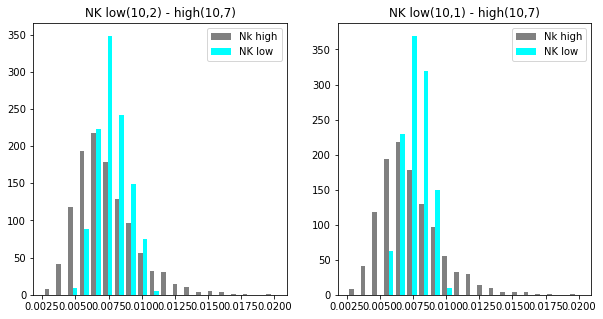

In [9]:
ctotal = []
ctotal.append(c1)
ctotal.append(c2)

ctotal6 = []
ctotal6.append(c1)
ctotal6.append(c6)

n_bins = 20
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (10,5))
ax0, ax1 = axes.flatten()

colors = ['grey', 'aqua']
ax0.hist(ctotal, n_bins, density=True, histtype='bar', color=colors, label=["Nk high","NK low"])
ax0.legend(prop={'size': 10})
ax0.set_title("NK low(10,2) - high(10,7)")


ax1.hist(ctotal6, n_bins, density=True, histtype='bar', color=colors, label=["Nk high","NK low"])
ax1.legend(prop={'size': 10})
ax1.set_title("NK low(10,1) - high(10,7)")

In [10]:
N = 10
graph3 = landscape_as_graph(sorted_NK_landscape(10,2))

In [11]:
centralitymeasures3 = networkx.current_flow_betweenness_centrality(graph3, weight='fitness_difference', dtype= 'float', solver='full')

In [12]:
c3 = []
for item in centralitymeasures3.keys():
    c3.append(centralitymeasures3[item])

Text(0.5,1,'NK low + sorted')

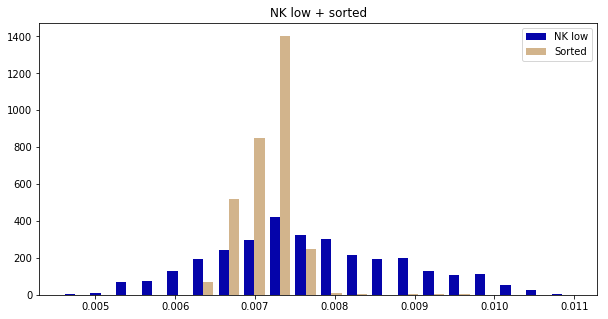

In [13]:
ctotal2 = []
ctotal2.append(c2)
ctotal2.append(c3)

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize= (10,5))

colors = ['#0504aa', 'tan']
ax0.hist(ctotal2, n_bins, density=True, histtype='bar', color=colors, label=["NK low", "Sorted"])
ax0.legend(prop={'size': 10})
ax0.set_title('NK low + sorted')

In [14]:
N = 10
graph4 = landscape_as_graph(sorted_NK_landscape(10,7))
centralitymeasures4 = networkx.current_flow_betweenness_centrality(graph4, weight='fitness_difference', dtype= 'float', solver='full')
c4 = []
for item in centralitymeasures4.keys():
    c4.append(centralitymeasures4[item])
    
ctotal3 = []
ctotal3.append(c1)
ctotal3.append(c4)

Text(0.5,1,'NK high + sorted')

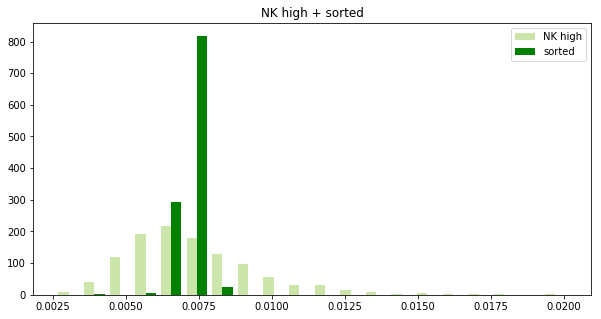

In [15]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize= (10,5))

colors = ['#CCE5AA', 'green']
ax0.hist(ctotal3, n_bins, density=True, histtype='bar', color=colors, label=["NK high", "sorted"])
ax0.legend(prop={'size': 10})
ax0.set_title('NK high + sorted')

In [16]:
N=10
K1=0
K2=7
NK1 = make_NK_land(N,K1)
NK2 = make_NK_land(N,K2)
graph5 = landscape_as_graph(layer_landscapes(NK1,NK2))
#nx.draw_networkx(graph)

In [17]:
centralitymeasures5 = networkx.current_flow_betweenness_centrality(graph5, weight='fitness_difference', dtype= 'float', solver='full')

In [18]:
c5 = []
for item in centralitymeasures5.keys():
    c5.append(centralitymeasures5[item])
    
ctotal4 = []
ctotal4.append(c1)
ctotal4.append(c5)

Text(0.5,1,'NK high + layered')

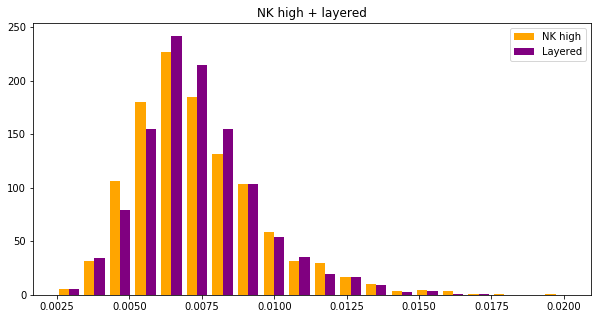

In [19]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize= (10,5))

colors = ['orange', 'purple']
ax0.hist(ctotal4, n_bins, density=True, histtype='bar', color=colors, label=["NK high","Layered"])
ax0.legend(prop={'size': 10})
ax0.set_title('NK high + layered')

Text(0.5,1,'NK low + layered')

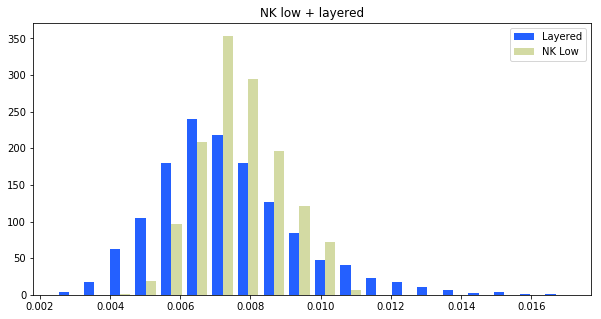

In [21]:
ctotal4 = []
ctotal4.append(c5)
ctotal4.append(c2)

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize= (10,5))

colors = ['#2460FF', '#D3DAA3']
ax0.hist(ctotal4, n_bins, density=True, histtype='bar', color=colors, label=["Layered", "NK Low"])
ax0.legend(prop={'size': 10})
ax0.set_title('NK low + layered')

Text(0.5,1,'sorted + layered')

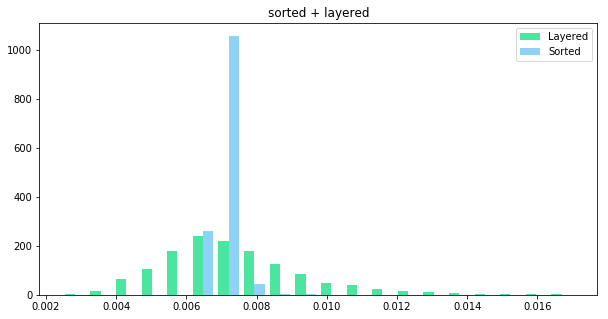

In [22]:
ctotal5 = []
ctotal5.append(c5)
ctotal5.append(c3)

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize= (10,5))

colors = ['#4AE59E', '#90D1F7']
ax0.hist(ctotal5, n_bins, density=True, histtype='bar', color=colors, label=["Layered", "Sorted"])
ax0.legend(prop={'size': 10})
ax0.set_title('sorted + layered')

In [71]:
def scatter_zip(graph, centrality_scores):
    x,y = [],[]
    for node in graph.nodes():
        x.append(graph.node[node]["fitness"])
        y.append(centrality_scores[node])
        
    return x,y

In [60]:
def local_max_split(graph,centrality_scores):
    max_list=[]
    notmax_list=[]
    for node in graph.nodes():
        current_fitness = graph.node[node]["fitness"]
        neighbor_list = list(nx.single_source_shortest_path_length(graph,source=node,cutoff=1).keys()) # gets neighbor indices
        if any([graph.node[neighbor]["fitness"] > current_fitness for neighbor in neighbor_list]):
            notmax_list.append(centrality_scores[node])
        else:
            max_list.append(centrality_scores[node])

    return [max_list,notmax_list]

[Text(0,0,'Local Max'), Text(0,0,'Not Max')]

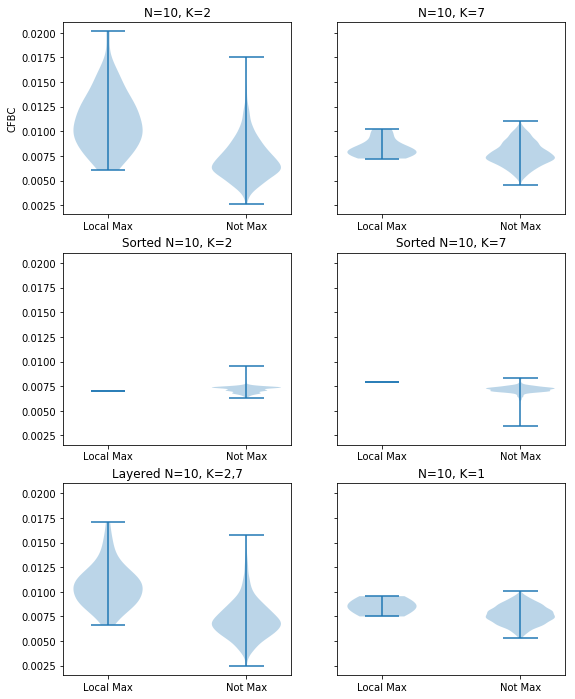

In [68]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(9, 12), sharey=True)
ax1.set_title('N=10, K=2')
ax1.set_ylabel('CFBC')
ax1.violinplot(local_max_split(graph1,centralitymeasures1))
ax1.set_xticks([1,2])
ax1.set_xticklabels(["Local Max","Not Max"])

ax2.set_title('N=10, K=7')
ax2.violinplot(local_max_split(graph2,centralitymeasures2))
ax2.set_xticks([1,2])
ax2.set_xticklabels(["Local Max","Not Max"])


ax3.set_title('Sorted N=10, K=2')
ax3.violinplot(local_max_split(graph3,centralitymeasures3))
ax3.set_xticks([1,2])
ax3.set_xticklabels(["Local Max","Not Max"])

ax4.set_title('Sorted N=10, K=7')
ax4.violinplot(local_max_split(graph4,centralitymeasures4))
ax4.set_xticks([1,2])
ax4.set_xticklabels(["Local Max","Not Max"])

ax5.set_title("Layered N=10, K=2,7")
ax5.violinplot(local_max_split(graph5,centralitymeasures5))
ax5.set_xticks([1,2])
ax5.set_xticklabels(["Local Max","Not Max"])

ax6.set_title('N=10, K=1')
ax6.violinplot(local_max_split(graph6,centralitymeasures6))
ax6.set_xticks([1,2])
ax6.set_xticklabels(["Local Max","Not Max"])



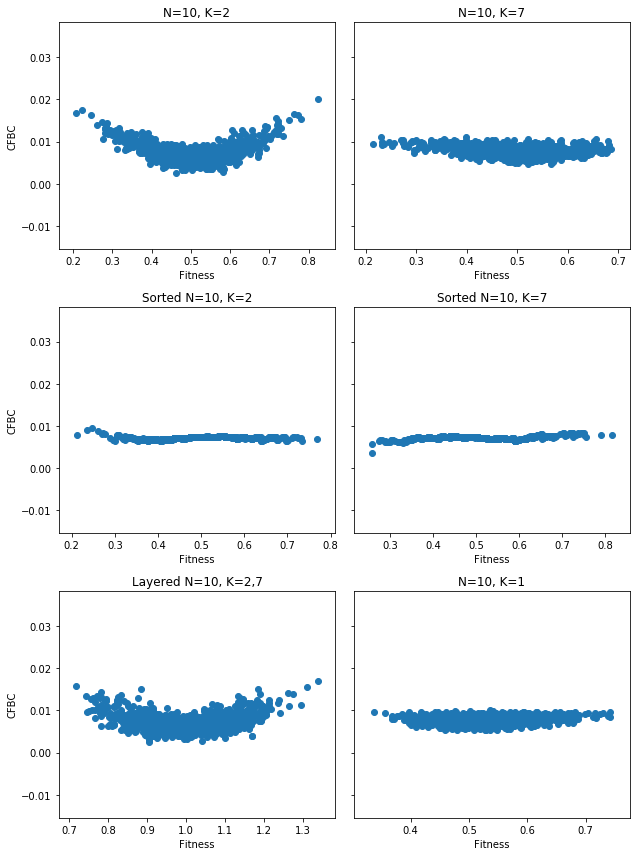

In [76]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(9, 12), sharey=True)
ax1.set_title('N=10, K=2')
ax1.set_ylabel('CFBC')
x,y = scatter_zip(graph1,centralitymeasures1)
ax1.scatter(x,y)
ax1.set_xlabel("Fitness")


ax2.set_title('N=10, K=7')
x,y = scatter_zip(graph2,centralitymeasures2)
ax2.scatter(x,y)
ax2.set_xlabel("Fitness")


ax3.set_ylabel('CFBC')
ax3.set_title('Sorted N=10, K=2')
x,y = scatter_zip(graph3,centralitymeasures3)
ax3.scatter(x,y)
ax3.set_xlabel("Fitness")


ax4.set_title('Sorted N=10, K=7')
x,y = scatter_zip(graph4,centralitymeasures4)
ax4.scatter(x,y)
ax4.set_xlabel("Fitness")

ax5.set_ylabel('CFBC')
ax5.set_title("Layered N=10, K=2,7")
x,y = scatter_zip(graph5,centralitymeasures5)
ax5.scatter(x,y)
ax5.set_xlabel("Fitness")

ax6.set_title('N=10, K=1')
x,y = scatter_zip(graph6,centralitymeasures6)
ax6.scatter(x,y)
ax6.set_xlabel("Fitness")

plt.tight_layout()